# Assignment 1 - A* Search DA221

- Name- Aryan Gupta
- Roll Number- 230150003

Source- [A Formal Basis for the Heuristic Determination of Minimum Cost Paths - PETER E. HART, NILS J. NILSSON, AND BERTRAM RAPHAEL](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4082128)

## Importing Libraries

In [5]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

## Part A - Implementing A* Search

In [6]:
# returns path and cost
def a_star_search(graph, start, goal, heuristic):
    # Each node contains (f_score, g_score, city, path_taken)
    
    # f_score = g + h , implemented directly from research paper
    # g_score = cost so far from start
    
    # priority queue for managing nodes' visit
    heap = []
    
    # Initialize
    g_start = 0
    f_start = g_start + heuristic[start]
    
    heapq.heappush(heap, (f_start, g_start, start, [start]))
    
    # Visited dictionary to store best g_score
    visited = {start: g_start}
    
    while heap:
        f_current, g_current, current_city, path = heapq.heappop(heap)
        
        # goal reached, return path and cost
        if current_city == goal:
            return path, g_current
        
        # expand neighbors
        for (neighbor, distance) in graph[current_city]:
            g_neighbor = g_current + distance
            f_neighbor = g_neighbor + heuristic[neighbor]
            
            if (neighbor not in visited) or (g_neighbor < visited[neighbor]):
                visited[neighbor] = g_neighbor
                new_path = path + [neighbor]
                heapq.heappush(heap, (f_neighbor, g_neighbor, neighbor, new_path))
    
    # goal not reachable
    return None, -1

## Part B - Applying on a state space graph

Let us take the graph below as example

![ROMANIA MAP](romania_map.png) 
Image Credits- Russell, S. & Norvig, P. (2020). Artificial Intelligence: A Modern Approach (4th ed.).

### Defining the graph

In [7]:
romania_map = {
    'Arad':        [('Zerind', 75), ('Sibiu', 140), ('Timisoara', 118)],
    'Zerind':      [('Arad', 75), ('Oradea', 71)],
    'Oradea':      [('Zerind', 71), ('Sibiu', 151)],
    'Sibiu':       [('Arad', 140), ('Oradea', 151), ('Fagaras', 99), ('RimnicuVilcea', 80)],
    'Fagaras':     [('Sibiu', 99), ('Bucharest', 211)],
    'RimnicuVilcea':[('Sibiu', 80), ('Pitesti', 97), ('Craiova', 146)],
    'Pitesti':     [('RimnicuVilcea', 97), ('Craiova', 138), ('Bucharest', 101)],
    'Timisoara':   [('Arad', 118), ('Lugoj', 111)],
    'Lugoj':       [('Timisoara', 111), ('Mehadia', 70)],
    'Mehadia':     [('Lugoj', 70), ('Drobeta', 75)],
    'Drobeta':     [('Mehadia', 75), ('Craiova', 120)],
    'Craiova':     [('Drobeta', 120), ('RimnicuVilcea', 146), ('Pitesti', 138)],
    'Bucharest':   [('Fagaras', 211), ('Pitesti', 101), ('Giurgiu', 90), ('Urziceni', 85)],
    'Giurgiu':     [('Bucharest', 90)],
    'Urziceni':    [('Bucharest', 85), ('Hirsova', 98), ('Vaslui', 142)],
    'Hirsova':     [('Urziceni', 98), ('Eforie', 86)],
    'Eforie':      [('Hirsova', 86)],
    'Vaslui':      [('Urziceni', 142), ('Iasi', 92)],
    'Iasi':        [('Vaslui', 92), ('Neamt', 87)],
    'Neamt':       [('Iasi', 87)]
}

# heuristic function - straight line distance from Bucharest
hSLD = {
    'Arad': 366, 'Bucharest': 0, 'Craiova': 160, 'Drobeta': 242, 'Eforie': 161,
    'Fagaras': 176, 'Giurgiu': 77, 'Hirsova': 151, 'Iasi': 226, 'Lugoj': 244,
    'Mehadia': 241, 'Neamt': 234, 'Oradea': 380, 'Pitesti': 100, 'RimnicuVilcea': 193,
    'Sibiu': 253, 'Timisoara': 329, 'Urziceni': 80, 'Vaslui': 199, 'Zerind': 374
}

### Implementing function

In [8]:
start_city = "Arad"
goal_city = "Bucharest"

path, cost = a_star_search(romania_map, start_city, goal_city, hSLD)

if path:
    print(f"Path found by A* from {start_city} to {goal_city}: {path}")
    print(f"Total path cost: {cost}")
else:
    print(f"No path found from {start_city} to {goal_city}.")

Path found by A* from Arad to Bucharest: ['Arad', 'Sibiu', 'RimnicuVilcea', 'Pitesti', 'Bucharest']
Total path cost: 418


## Visualising results

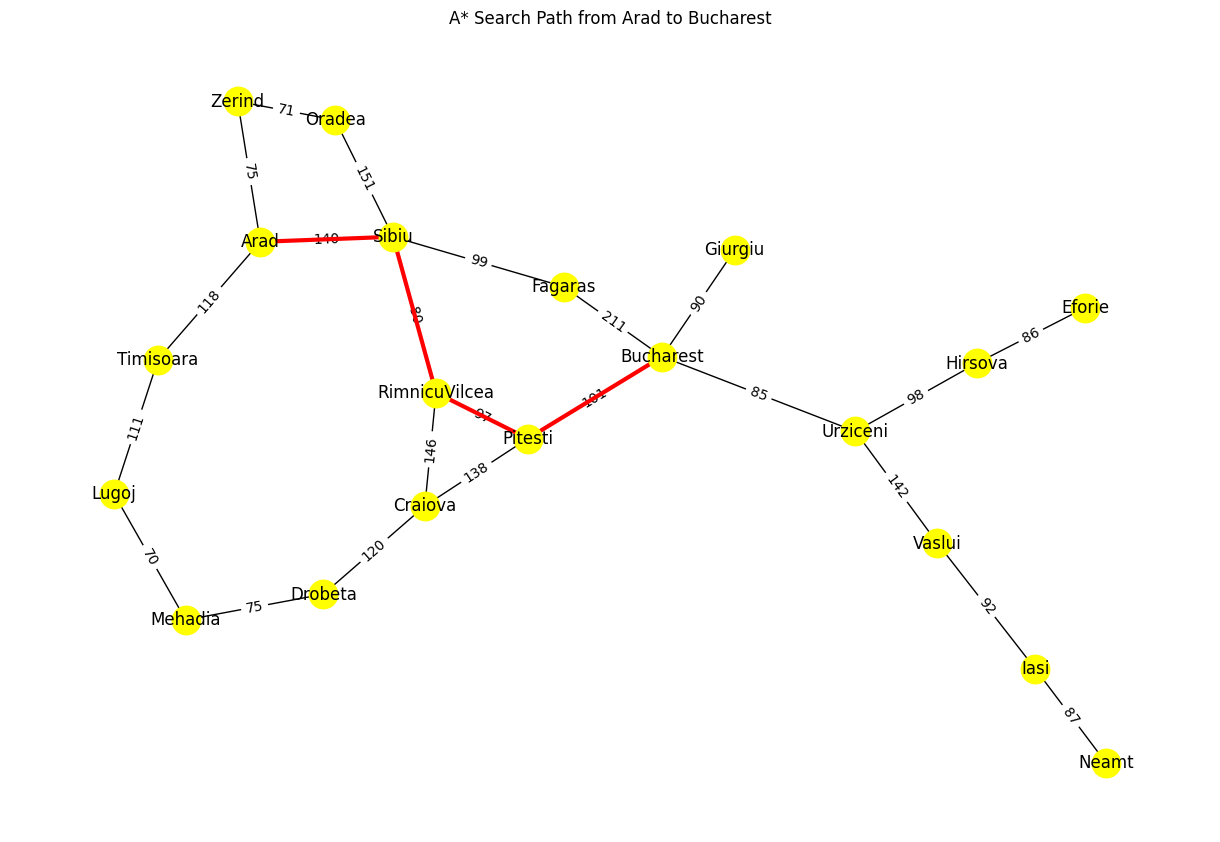

In [17]:
# Building a graph
G = nx.Graph()
for city, neighbors in romania_map.items():
    for neighbor, dist in neighbors:
        G.add_edge(city, neighbor, weight=dist)

# using layout for better representation
pos = nx.spring_layout(G, seed=69)

plt.figure(figsize=(12,8))
nx.draw(G, pos, with_labels=True, node_size=420, node_color="yellow")
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Now highlight the path found by A*
if path:
    # Pair up consecutive cities in the path
    path_edges = list(zip(path, path[1:]))

    # Draw the path edges in a different color
    nx.draw_networkx_edges(
        G, pos,
        edgelist=path_edges,
        width=3,
        edge_color="red"
    )

plt.title(f"A* Search Path from {start_city} to {goal_city}")
plt.axis("off")
plt.show()
